# <h1 align="center"> Heart Disease Project <h1/>

### <h2 align="center"> Heart Disease Analysis and Prediction <h2/>
    

# Purpose:
    
In this project we are going to develop a model that could predict which person are more likely to have a heart disease. We are going to explore the data and then create a model to predict how likely the person get a heart disease.

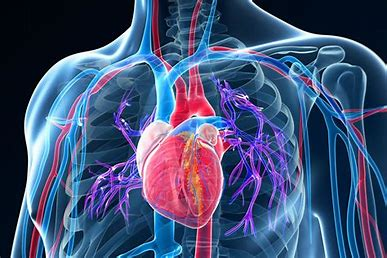

## Dataset Description
    
In order to understand our Dataset we have to understand variables present in the dataset properly.

|Attribute |	Description |
| :---: | :---:|
|Age|	Age of a patient [years]|
|Sex |	Gender of the patient [M: 1, F: 0]|
|ChestPain|chest pain type [3: Typical Angina, 2: Atypical Angina, 1: Non-Anginal Pain, 0: Asymptomatic]|
|RestingBP|	Blood pressure in Hg (Normal blood pressure - 120/80 Hg)|
|Cholesterol|	Serum cholestrol level in blood (Normal cholesterol level below for adults 200mg/dL)|
|FastingBS|	Fasting Blood Sugar (0=Normal less than 100mg/dL for non diabetes ,1=for diabetes 100-125mg/dL)|
|RestingECG	|resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]|
|thalach--MaxHR	|maximum heart rate achieved [Numeric value between 71 and 202]|
|ExerciseAngina	|exercise-induced angina [1: Yes, 0: No]|
|Oldpeak|	oldpeak = ST depression induced by exercise relative to rest. [Numeric value measured in depression]|
|ST_Slope	|the slope of the peak exercise ST segment [2: upsloping, 1: flat, 0: downsloping]|
|CA| Number of Major Vessels 0-4 (colored by flourosopy)|
|Thal| 0:No Defect,1:Reversible Defect,2:Non-reversible Defect,3:Fixed defect|
|Target---HeartDisease|	output class [1: heart disease, 0: Normal]|

# Summary of the Project:
    
    
The Heart Disease Analysis dataset is used for this project.

The dataset contains 1,025 observations with 14 features.

The target variable is "target", which is a binary variable indicating whether the person has heart disease or not.

The goal of the project is to develop a model to predict correct result of person having heart disease.

The project will involve exploratory data analysis, feature engineering, and building and evaluating machine learning models.


### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for max rows & columns we can use set_option to display  but as we have less columns & rows we won't  be using set_option.
# pd.set_option('display.max_rows',15000)
# pd.set_option('display.max_columns',500)
# pd.set_option('display.width',15000)

### Loading The Dataset

In [3]:
df=pd.read_csv('Heart Disease Data.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

### Shape

In [5]:
df.shape

(1025, 14)

### Inforamtion of datasets(variable counts & Type)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### changing te datatypes of variables which are catogorical but mentioned as int for EDA purpose  

In [7]:
df['sex']=df['sex'].astype('object')
df['cp']=df['cp'].astype('object')
df['fbs']=df['fbs'].astype('object')
df['restecg']=df['restecg'].astype('object')
df['exang']=df['exang'].astype('object')
df['slope']=df['slope'].astype('object')
df['ca']=df['ca'].astype('object')
df['thal']=df['thal'].astype('object')
df['target']=df['target'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


### Basic Summary

In [9]:
df.describe()

age     trestbps        chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707   246.00000   149.114146     1.071512
std       9.072290    17.516718    51.59251    23.005724     1.175053
min      29.000000    94.000000   126.00000    71.000000     0.000000
25%      48.000000   120.000000   211.00000   132.000000     0.000000
50%      56.000000   130.000000   240.00000   152.000000     0.800000
75%      61.000000   140.000000   275.00000   166.000000     1.800000
max      77.000000   200.000000   564.00000   202.000000     6.200000

### Unique Counts of each Variable

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Checking For Null Values

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

####  ->the Dataset has Zero Null values.



#####


### Value Counts of each Variable

In [12]:
for i in df.columns:
    print( df[i].value_counts())
    print('............................................')

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
............................................
1    713
0    312
Name: sex, dtype: int64
............................................
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
............................................
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154     

# EDA

##### Visulals are easy to interpret and analyse. Data Visualization will help us to gain more key insights from our dataset. Let's explore our dataset using Python's important and powerful libraries for visualization i.e. Matplotlib and seaborn.

### Exploration of Numerical Columns using Histograms


We can explore all numerical columns using df.hist(). It help us understand the data better, with this visualization we are able to see how our data is distributed and if there are any outliers in the data sets.

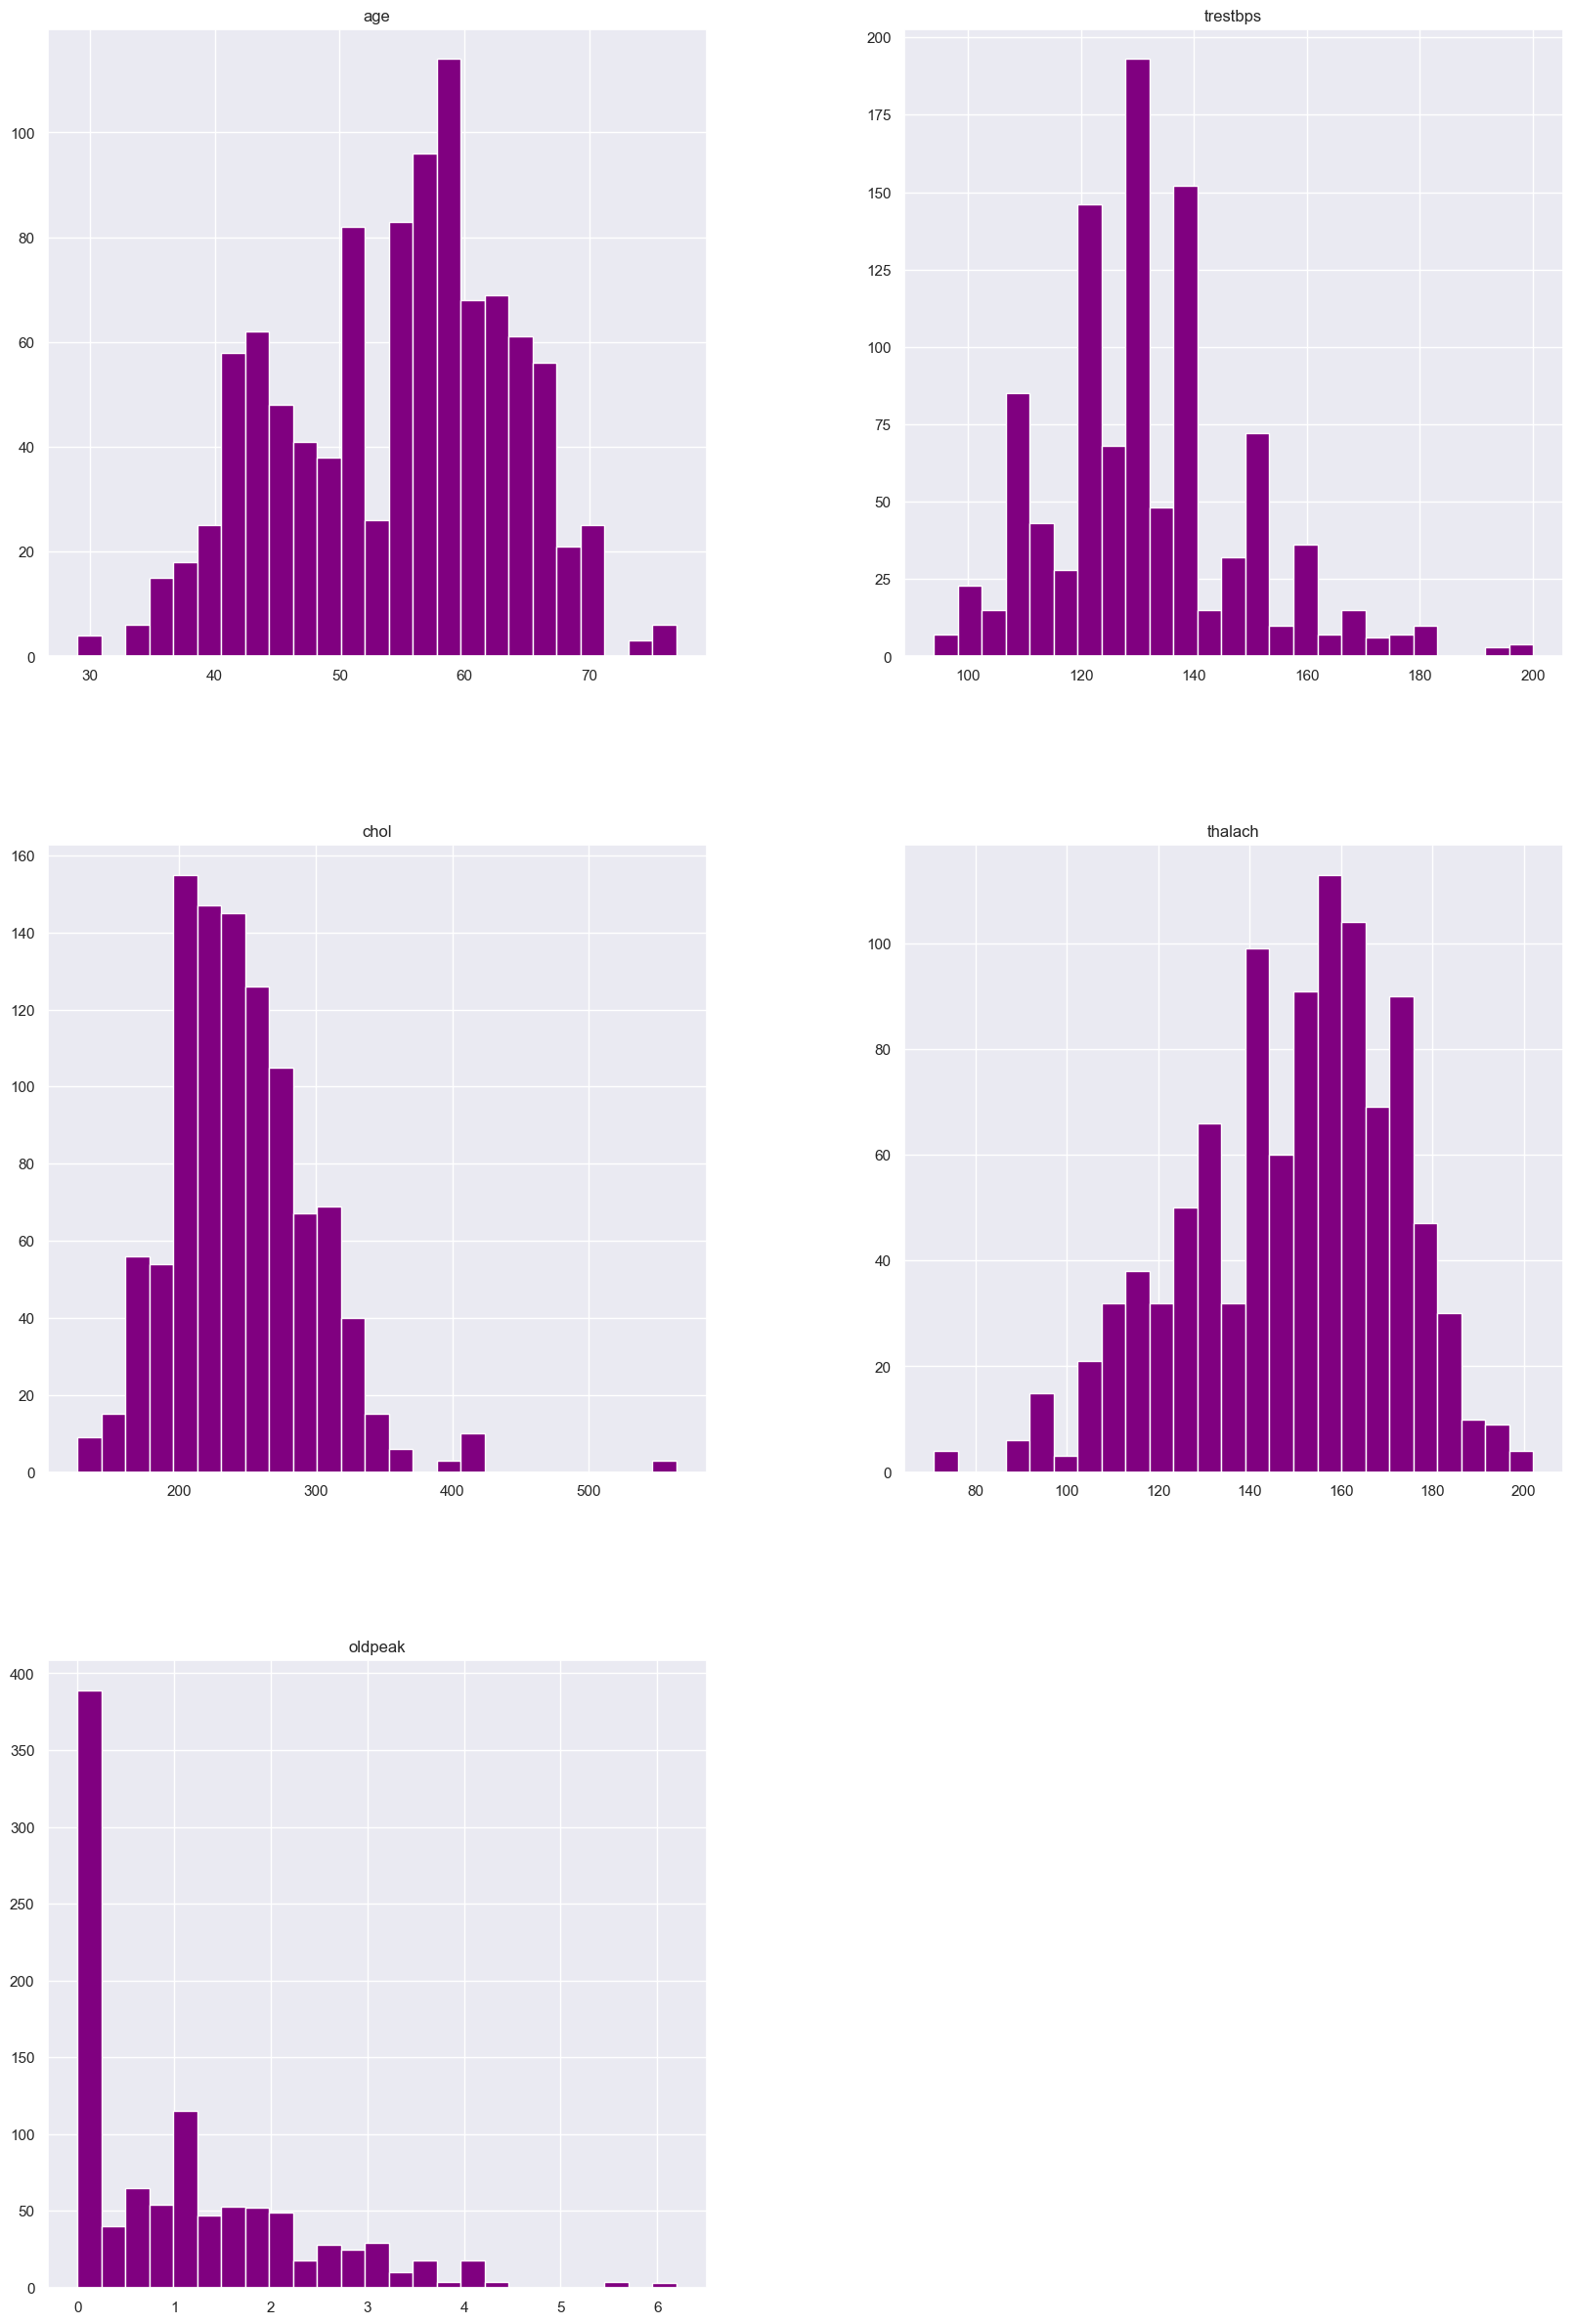

In [13]:
df.hist(bins=25,figsize=(20,30),color='purple')
plt.show()

#### A few observations can be made based on histograms for numerical features:
#### Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g.  old peak, trestbps).
#### 'thalach' is left-skewed which suggest that most of the patients are having max heart rate between 100-160 bps.
#### Age distribution is a slightly right-skewed normal distribution with the bulk of the patients between 45 and 65 years old.


## Distrbution of Target variable

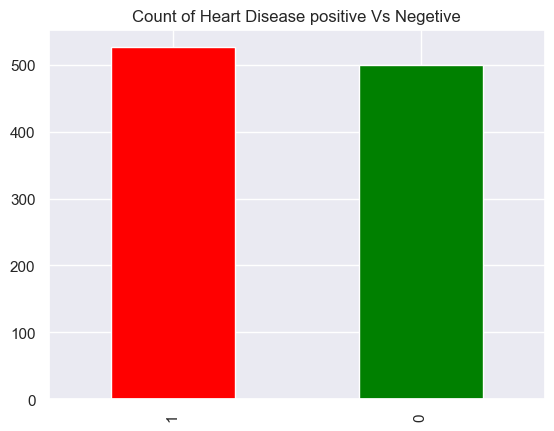

In [14]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])
plt.title('Count of Heart Disease positive Vs Negetive')
plt.show()

### The above plot shows that we have more no. of positive cases followed by negetive.

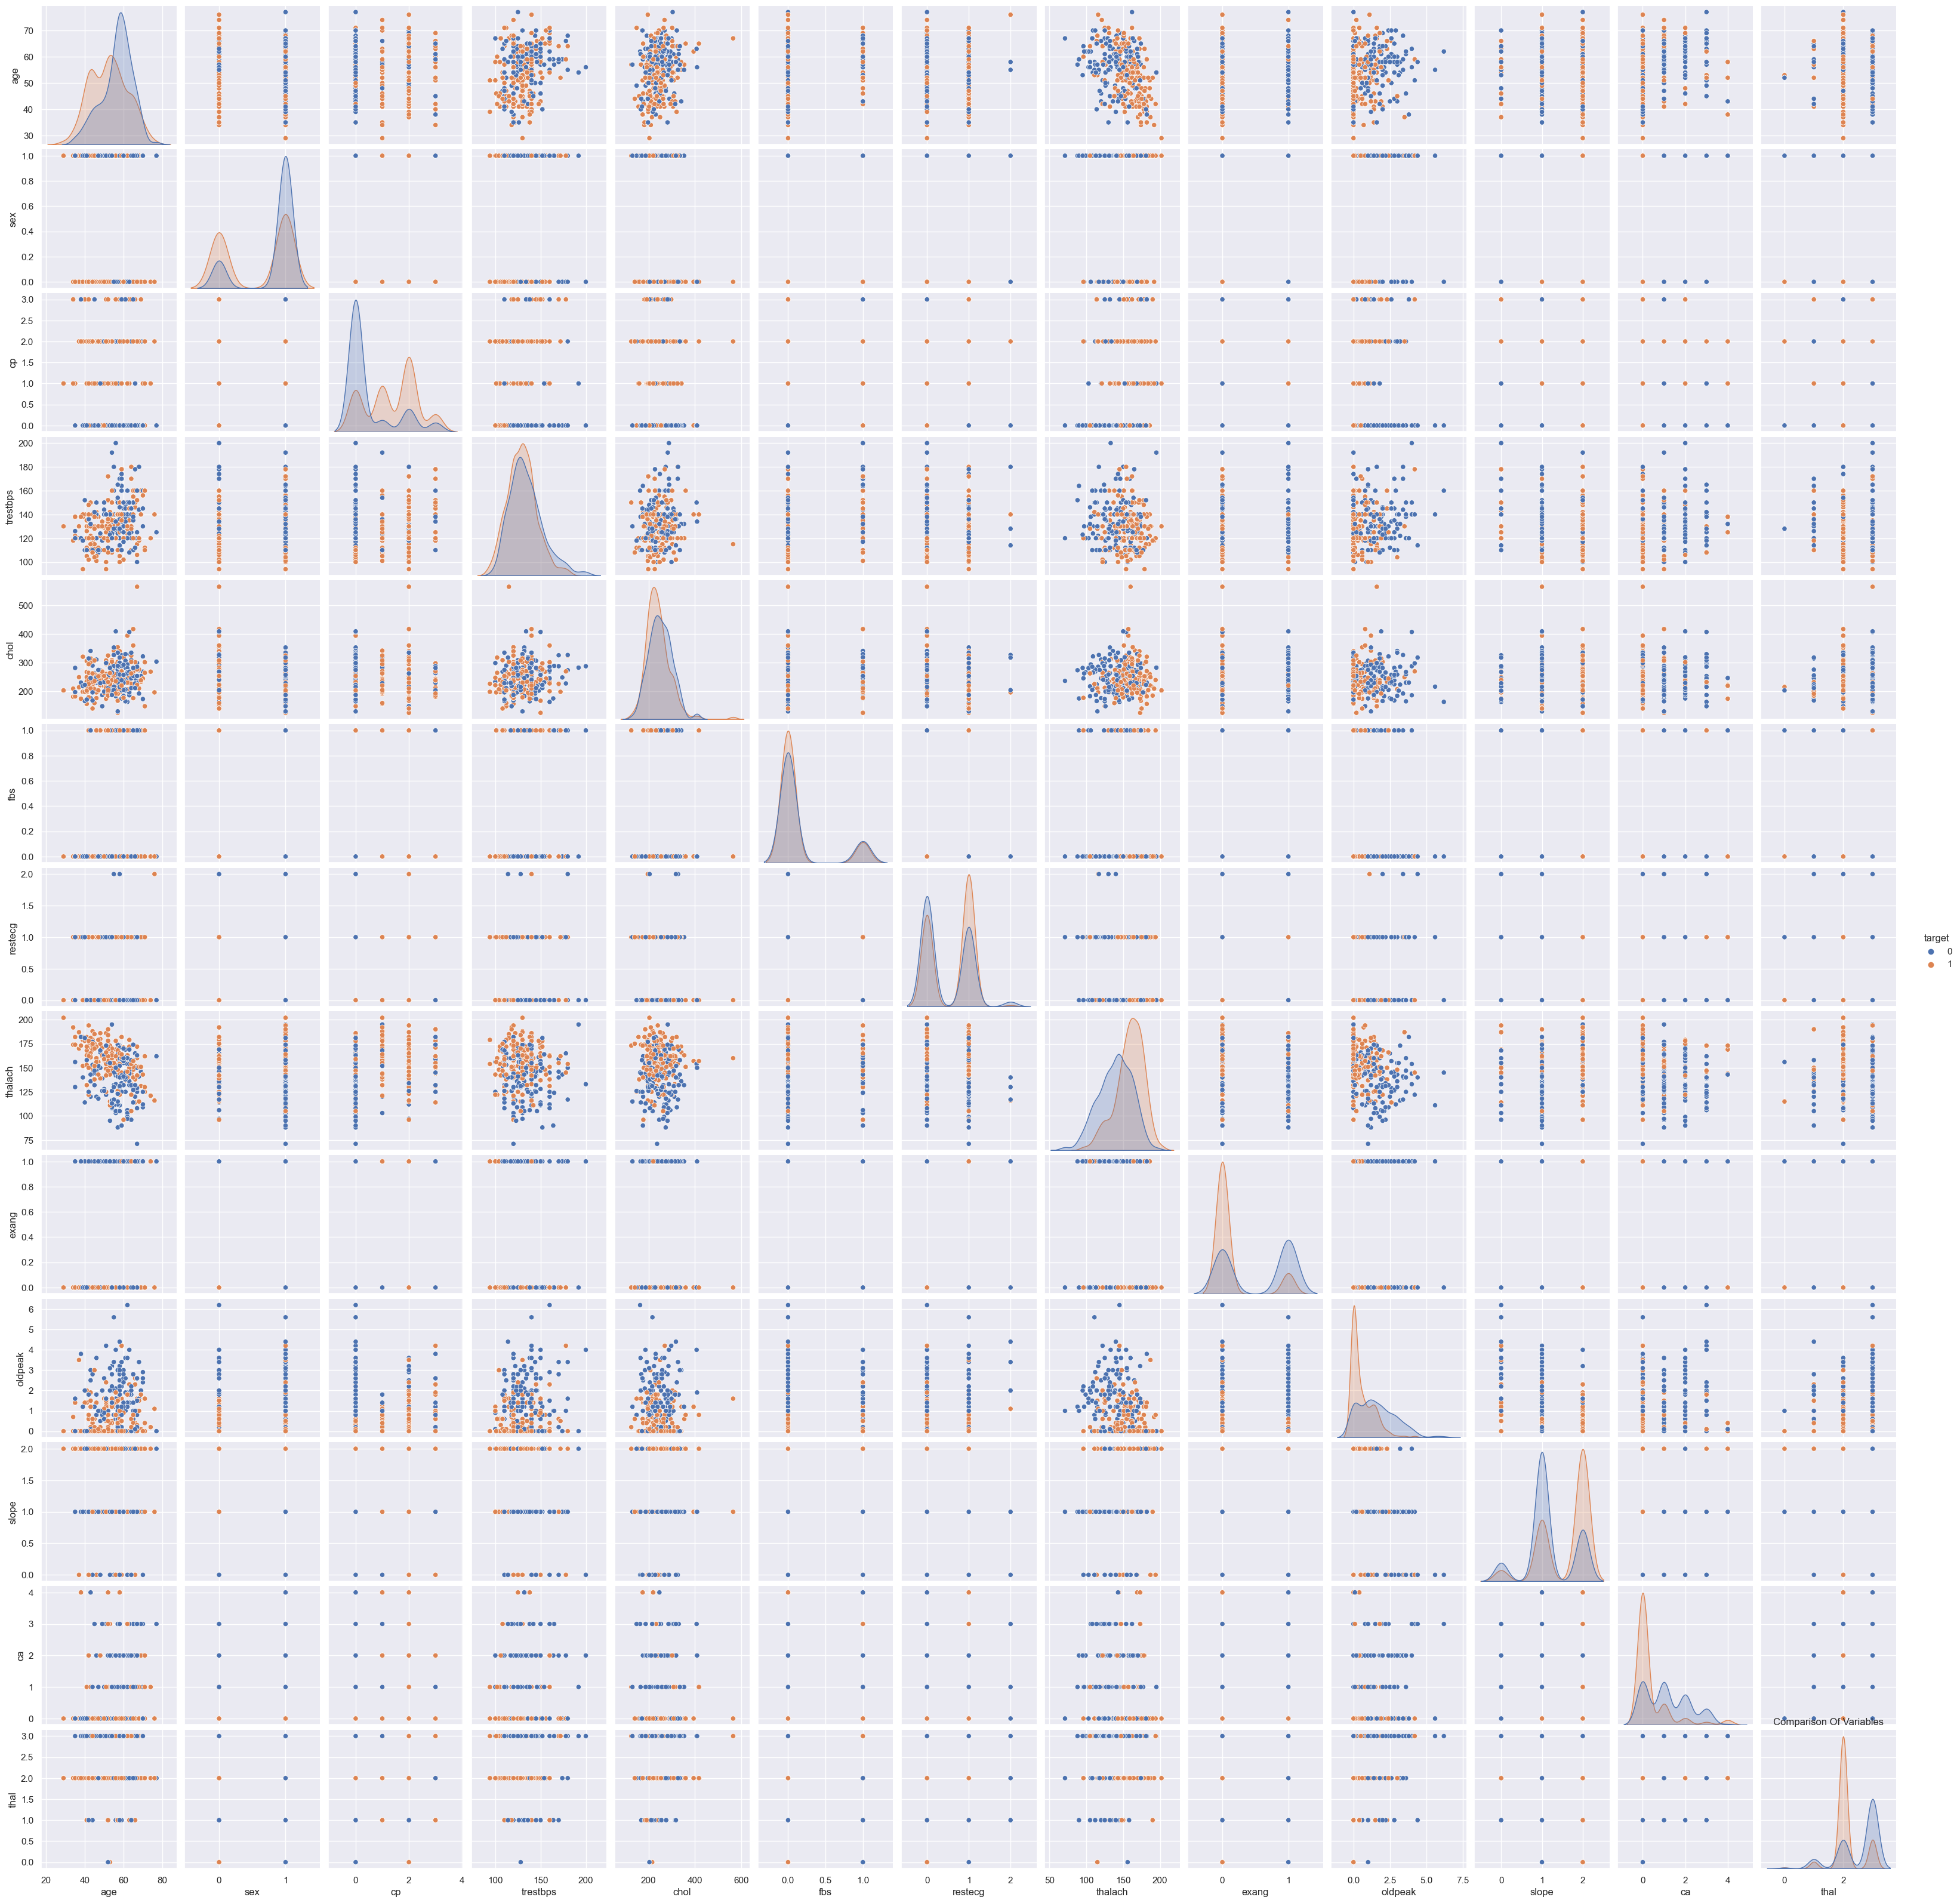

In [15]:
sns.pairplot(df,hue='target')      
plt.show()

#### The above plot visualize the pairwise relationships between defferent variables.its showing scatterplots for each pair  of variables in the Heart Disease Datasets.

## Exploration of Categorical columns on basis of gender

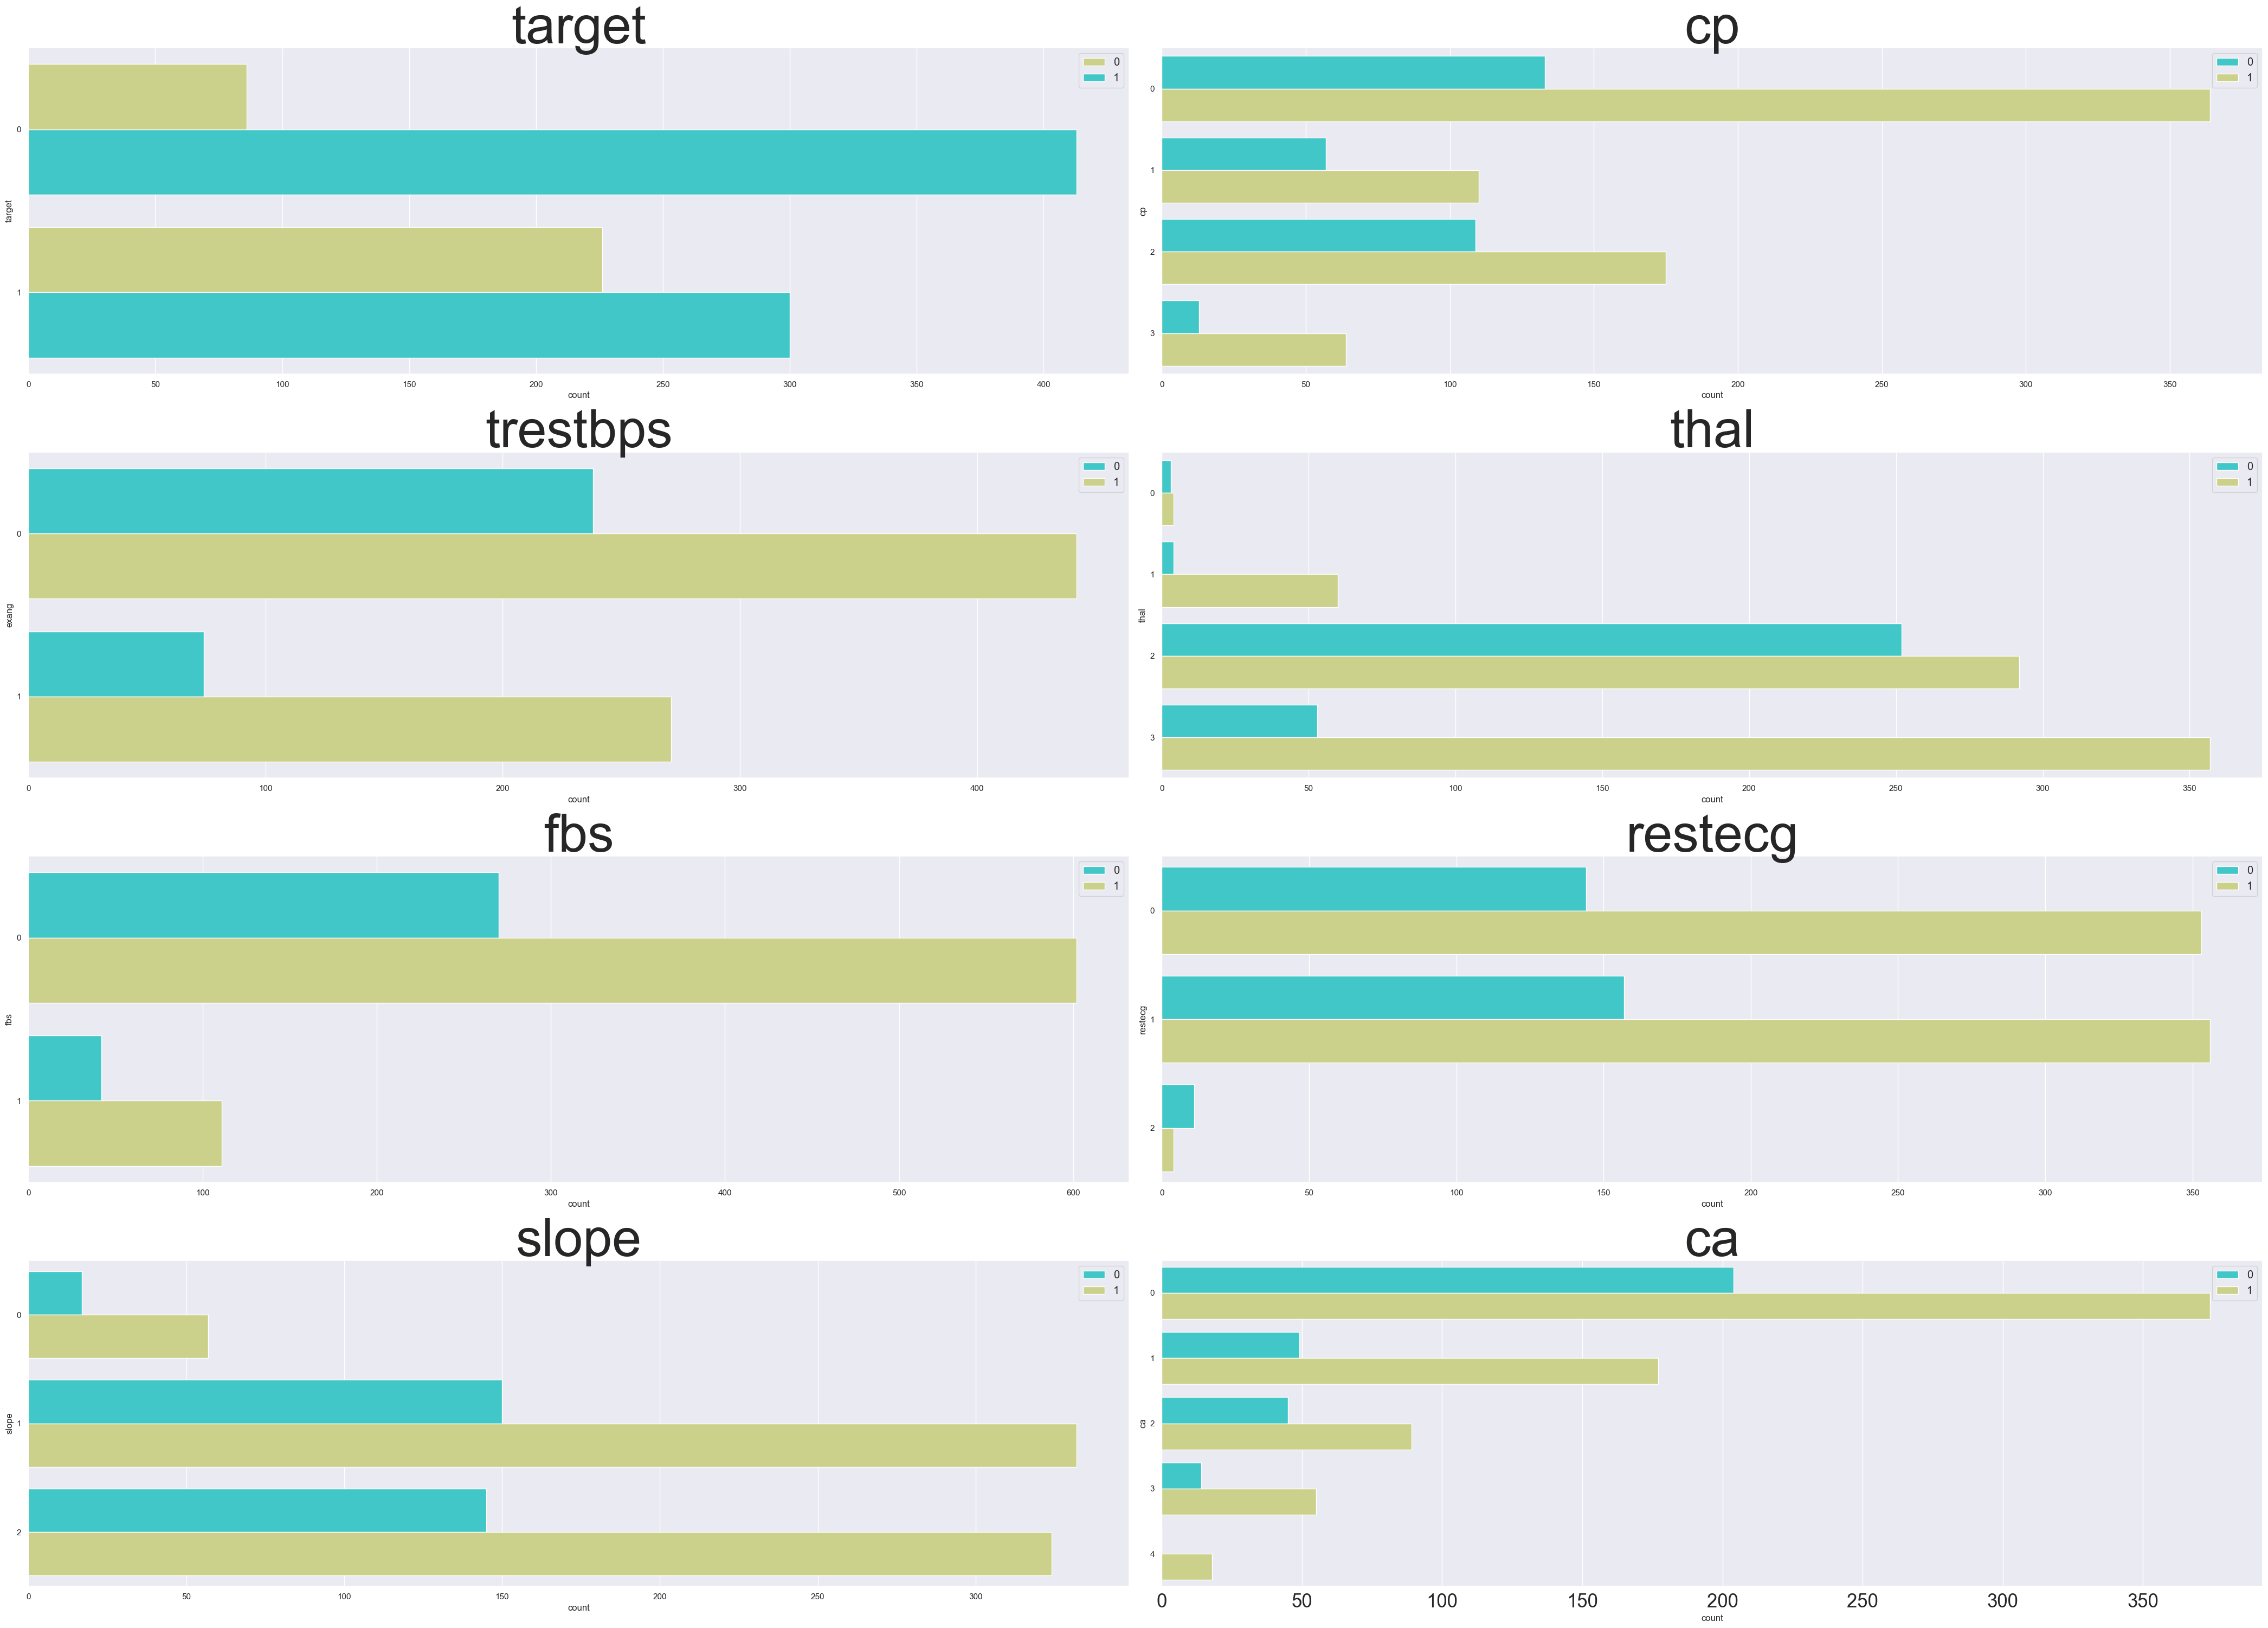

In [16]:
fig = plt.figure(figsize=(42,30))


#  subplot #1
plt.subplot(4,2,1)
plt.title('target', fontsize=70)
ax=sns.countplot(data = df, y = 'target', hue= "sex", palette='rainbow_r', orient="h")
ax.legend(fontsize='large')

#  subplot #2
plt.subplot(4,2,2)
plt.title('cp', fontsize=70)
bx=sns.countplot(data = df, y = 'cp', hue= 'sex', palette='rainbow', orient="h")
bx.legend(fontsize='large')

#  subplot #3
plt.subplot(4,2,3)
plt.title('trestbps', fontsize=70)
cx=sns.countplot(data = df, y = 'exang', hue = 'sex', palette='rainbow', orient="h")
cx.legend(fontsize='large')

#  subplot #4
plt.subplot(4,2,4)
plt.title('thal', fontsize=70)
dx=sns.countplot(data = df, y = 'thal', hue = 'sex', palette='rainbow', orient="h")
dx.legend(fontsize='large')

#  subplot #5
plt.subplot(4,2,5)
plt.title('fbs', fontsize=70)
ex=sns.countplot(data = df, y = 'fbs', hue = 'sex', palette='rainbow', orient="h")
ex.legend(fontsize='large')

#  subplot #6
plt.subplot(4,2,6)
plt.title('restecg', fontsize=70)
fx=sns.countplot(data = df, y = 'restecg', hue = 'sex', palette='rainbow', orient="h")
fx.legend(fontsize='large')

#  subplot #7
plt.subplot(4,2,7)
plt.title('slope', fontsize=70)
gx=sns.countplot(data = df, y = 'slope', hue = 'sex', palette='rainbow', orient="h")
gx.legend(fontsize='large')

#  subplot #8
plt.subplot(4,2,8)
plt.title('ca', fontsize=70)
hx=sns.countplot(data = df, y = 'ca', hue = 'sex', palette='rainbow', orient="h")
hx.legend(fontsize='large')

# Adjust plot spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.xticks(fontsize=25)
plt.show()


#### From above countplot we can observe:
- We can see Gender-wise countplot data for all the categorical columns.
- We can get Idea of various categorical sub-values and their frequency with reference to Gender of patient.
- Heart Disease rate is greater in Male than Female patient.
- We can also see that males are leading in every countplot which suggest that female patients has less chances to get a heart diseas.



####

### Checking Relationship between target & sex variable using crosstab-

In [17]:
pd.crosstab(df.target,df.sex)

sex       0    1
target          
0        86  413
1       226  300

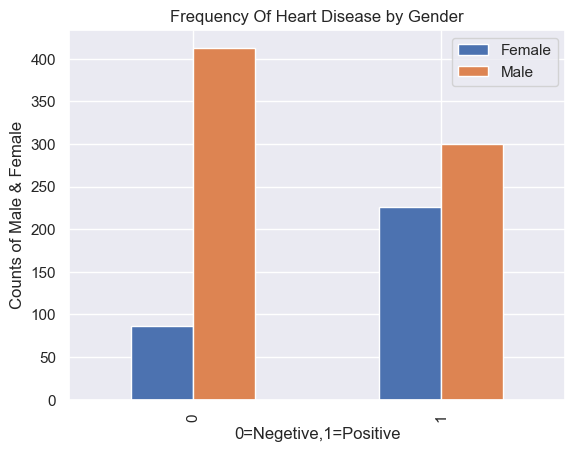

In [18]:
pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.title('Frequency Of Heart Disease by Gender')
plt.xlabel('0=Negetive,1=Positive')
plt.ylabel('Counts of Male & Female')
plt.legend(['Female','Male'])


#### -> According to the data we can conclude that males are mostly affected by heart disease rather than females.

### Checking Relationship of 'Target' with 'Chest Pain Type' & 'Fasting Blood Sugar' variables using countplot-

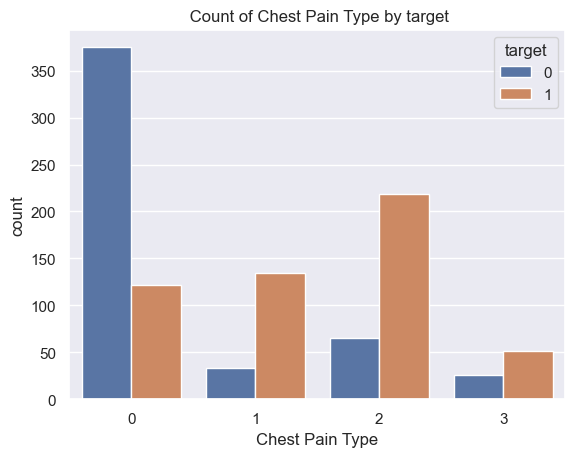

In [19]:
sns.countplot(data=df, x="cp", hue="target")
plt.title(' Count of Chest Pain Type by target')
plt.xlabel("Chest Pain Type")
plt.show()

####  From above countplot we can observe that: 
- patient with chest pain type 2 (Atypical Angina) follwed by chest pain type 1(Non-Anginal Pain)are more likely to get affected by heart disease.
- Also patient with chest pain type 1 are having least chances to get a heart disease.  

##

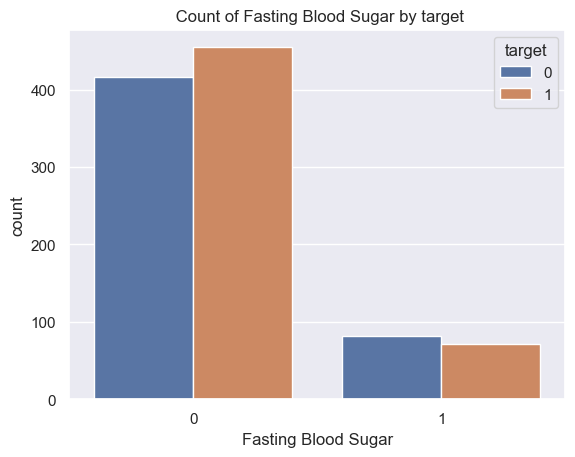

In [20]:
sns.countplot(data=df, x="fbs", hue="target")
plt.xlabel("Fasting Blood Sugar")
plt.title(' Count of Fasting Blood Sugar by target')
plt.show()

#### From above countplot we can observe that: 
- patient with Fasting Blood Sugar ,Normal (less than 100mg/dL)are having least chances to get a heart disease.
- Also patient having Fasting Blood Sugar more than normal range(100-125mg/dL) are having more chances to get a heart disease.

###

### Checking  'Age' wise relationship of 'Target' with 'Cholestrol' & 'Resting Blood Pressure' variables using scatterplot-

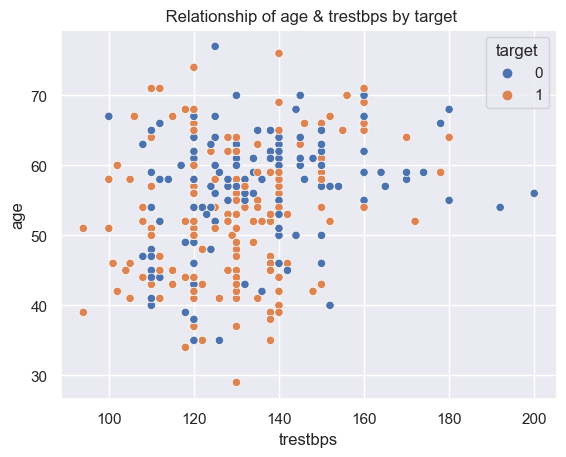

In [21]:
sns.scatterplot(data=df,x='trestbps',y='age',hue='target')
plt.title(' Relationship of age & trestbps by target')
plt.show()

#### -> Blood Pressure at resting stage age wise seems to be increasing.


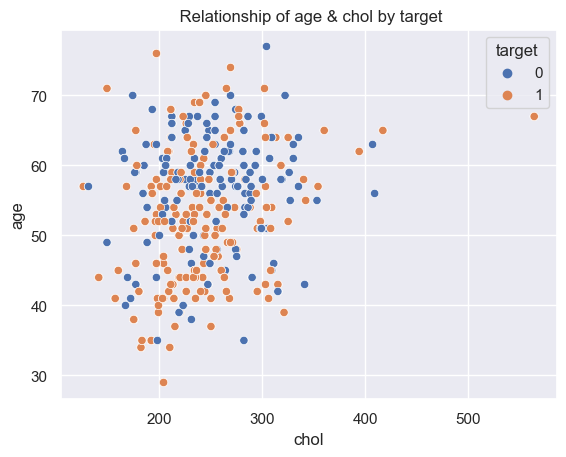

In [22]:
sns.scatterplot(data=df, x='chol',y='age',hue='target')
plt.title(' Relationship of age & chol by target')
plt.show()

#####  -> cholestrol level in elder patients seems to be higher as compare to younger pateints

### Correlation

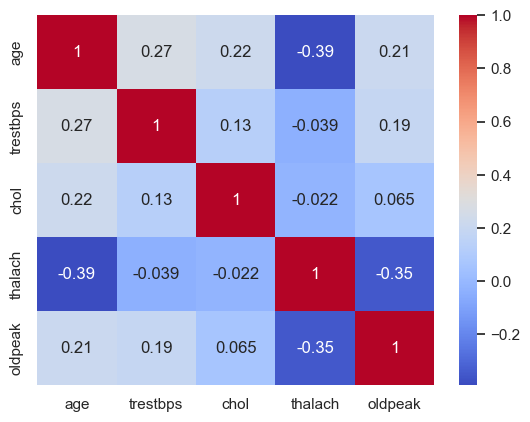

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

### Few key Learnings from the correlation vizualisation heatmap above:

- Age ,trestbps and oldpeak has a negetive correlation with thalach(max Heart Rate), which means that these are inversely propotional to max Heart Rate.

- Also ,No multicolinearity is present.



#### As EDA Part is done ,converting variables to its original datatype.

In [24]:
df.head()

age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca  \
0   52   1  0       125   212   0       1      168     0      1.0     2  2   
1   53   1  0       140   203   1       0      155     1      3.1     0  0   
2   70   1  0       145   174   0       1      125     1      2.6     0  0   
3   61   1  0       148   203   0       1      161     0      0.0     2  1   
4   62   0  0       138   294   1       1      106     0      1.9     1  3   

  thal target  
0    3      0  
1    3      0  
2    3      0  
3    3      0  
4    2      0

In [25]:
df['sex']=df['sex'].astype('int')
df['cp']=df['cp'].astype('int')
df['fbs']=df['fbs'].astype('int')
df['restecg']=df['restecg'].astype('int')
df['exang']=df['exang'].astype('int')
df['slope']=df['slope'].astype('int')
df['ca']=df['ca'].astype('int')
df['thal']=df['thal'].astype('int')
df['target']=df['target'].astype('int')

### Gender Wise Analysis  using groupby method

In [26]:
H_d= df.groupby('sex').agg({'age' : 'mean', "cp":'count','trestbps':'mean','chol':'mean',
                            'fbs':'sum','restecg':'count','thalach':'mean','exang':'count','oldpeak':'mean',
                            'slope':'count','target':'sum'})
H_d

age   cp    trestbps        chol  fbs  restecg     thalach  exang  \
sex                                                                            
0    55.849359  312  133.701923  261.455128   42      312  150.830128    312   
1    53.814867  713  130.697055  239.237027  111      713  148.363254    713   

      oldpeak  slope  target  
sex                           
0    0.921154    312     226  
1    1.137307    713     300

In [27]:
import plotly.express as px
px.bar(data_frame=H_d, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

### From above table & plot we can observe that:
- Average age of males & females are almost similar.
- cp(chest pain type) counts in males are higher tan females.
- Average resting blood pressure of males & females are almost similar.
- Average cholestrol levels in females are higher than males.
- the sum & count of fasting blood sugar and ecg are higher iin males than females.
- thalach(max heart Rate) is slightly higher in females as compare to males.
- ExerciseAngina & slope counts are less in females than males.
- males are mostly affected by heart disease followed by females.

### Splitting The Features & Target

In [28]:
x=df.drop(['target'],axis=1)
y=df['target']

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [30]:
x_sc

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

## Model Buliding

#### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.25,random_state=42)

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)


### Evaluation Matrix

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
confusion_matrix(y_test,y_pred_test)

array([[132,   0],
       [  6, 119]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.95      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [36]:
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('***************************')
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))

Training Accuracy 1.0
***************************
Testing Accuracy 0.9766536964980544


### As we can see the accuracy is 98% for this model using random forest algorithm. The model correctly identified 98% of the patients that are having Heart Disease.

#

## Let’s see what the model thinks are the important features/variables.

In [37]:
rf.feature_importances_

array([0.07602034, 0.03307884, 0.11087449, 0.07345129, 0.07831863,
       0.00927652, 0.01743016, 0.12715943, 0.05271013, 0.1276272 ,
       0.04544627, 0.12641402, 0.12219268])

In [38]:
imp=pd.DataFrame(index=x.columns,data=rf.feature_importances_,columns=['Feature Importance'])
imp=imp.sort_values('Feature Importance',ascending=False)
imp

Feature Importance
oldpeak             0.127627
thalach             0.127159
ca                  0.126414
thal                0.122193
cp                  0.110874
chol                0.078319
age                 0.076020
trestbps            0.073451
exang               0.052710
slope               0.045446
sex                 0.033079
restecg             0.017430
fbs                 0.009277

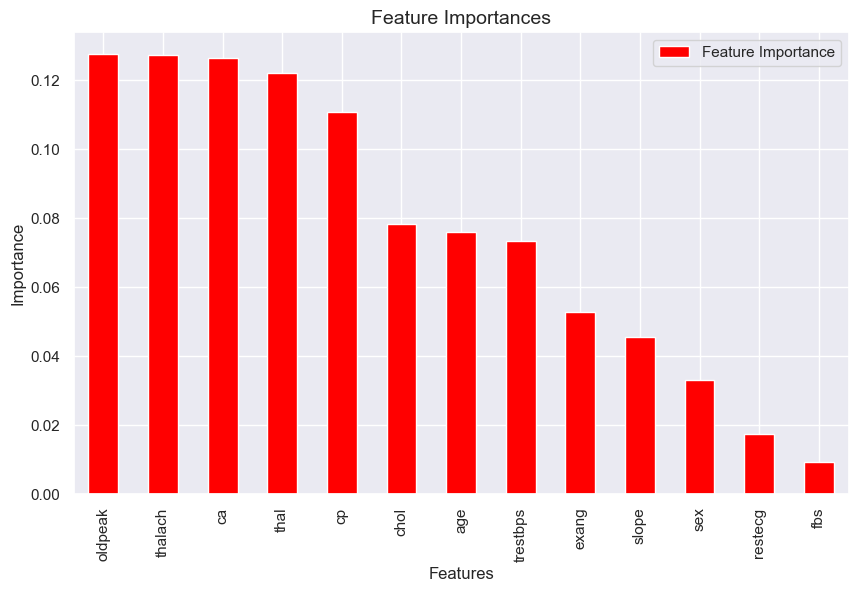

In [39]:
imp.plot(kind='bar',color='red',figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

####         - > 'thal' appears to be the most important feature followed by the ca,cp,oldpeak. 

### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

### Finding K-value by elbow method

In [41]:
error_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

In [42]:
error_rate

[0.011673151750972763,
 0.0311284046692607,
 0.07003891050583658,
 0.13229571984435798,
 0.17120622568093385,
 0.16342412451361868,
 0.15953307392996108,
 0.14785992217898833,
 0.14007782101167315,
 0.14785992217898833,
 0.17509727626459143,
 0.17120622568093385,
 0.17120622568093385,
 0.16342412451361868,
 0.17898832684824903,
 0.16731517509727625,
 0.17898832684824903,
 0.17120622568093385,
 0.1828793774319066,
 0.1867704280155642,
 0.16731517509727625,
 0.16731517509727625,
 0.17898832684824903,
 0.19066147859922178,
 0.1867704280155642,
 0.1867704280155642,
 0.19844357976653695,
 0.19455252918287938,
 0.1867704280155642]

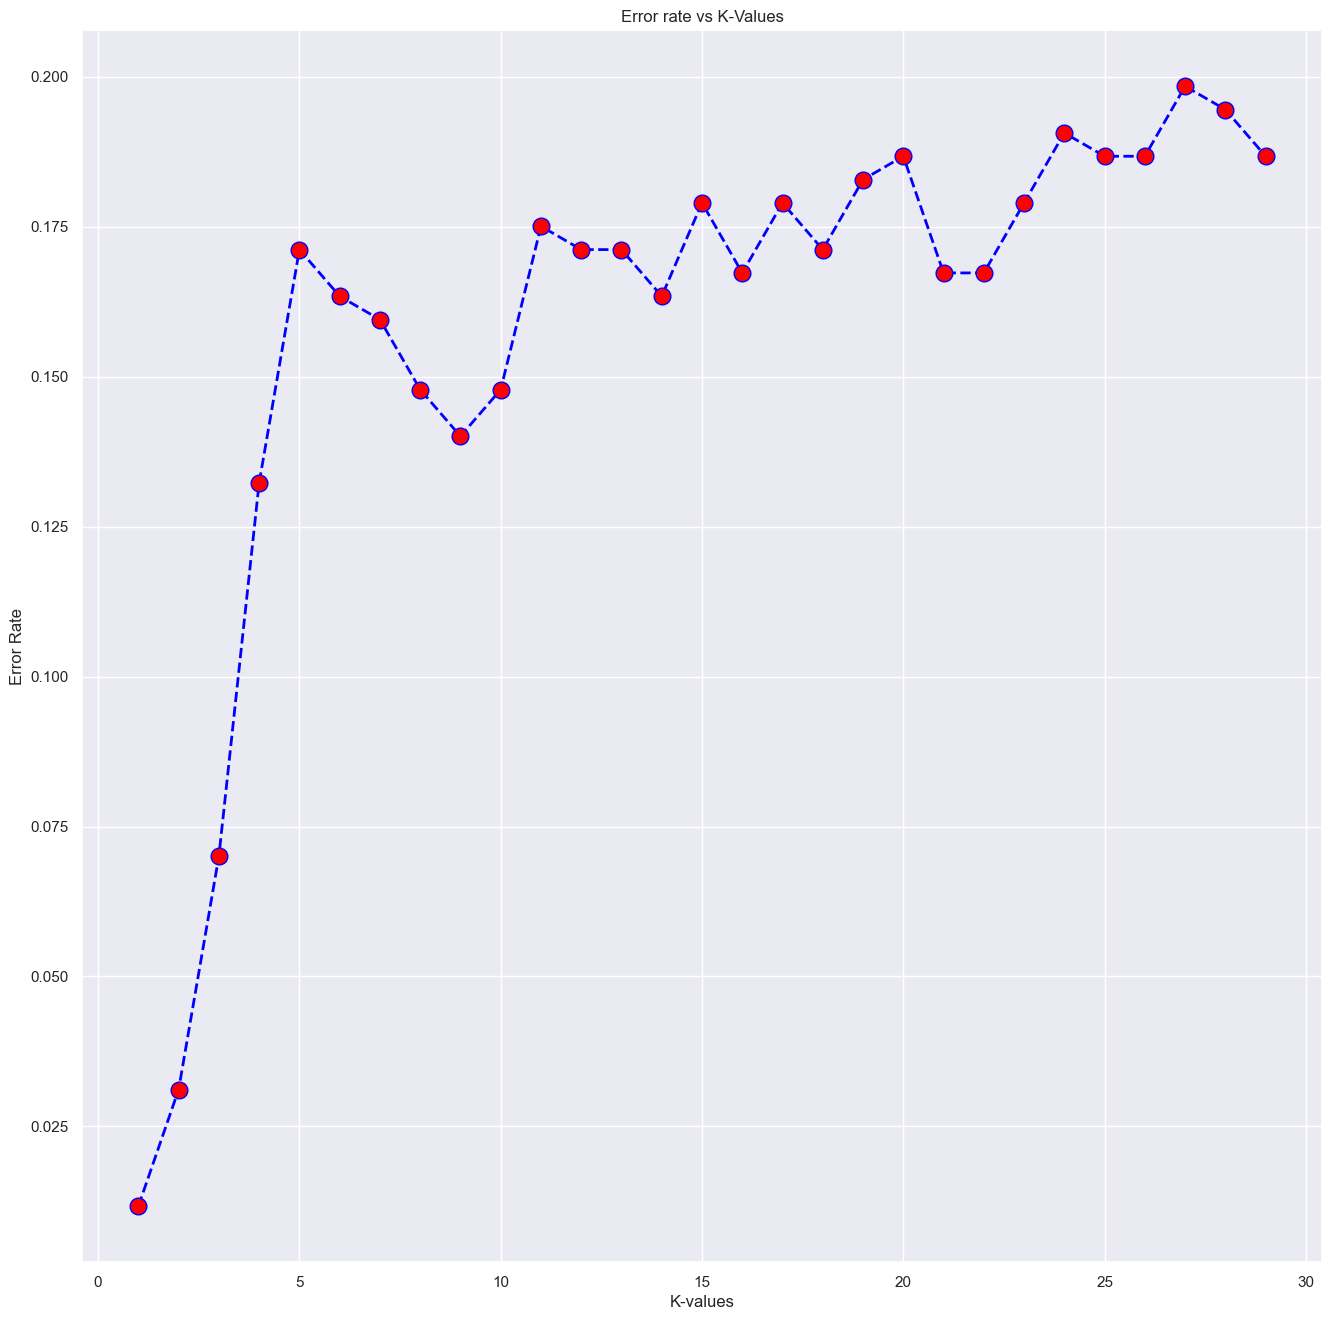

In [43]:
plt.figure(figsize=(16,16))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',linewidth=2,markersize=12,marker='o',markerfacecolor='red')
plt.title('Error rate vs K-Values')
plt.xlabel('K-values')
plt.ylabel('Error Rate')
plt.show()

In [44]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred_knn_train=knn.predict(x_train)
y_pred_knn_test=knn.predict(x_test)

### Evaluation Matrix

In [45]:
confusion_matrix(y_test,y_pred_knn_test)

array([[132,   0],
       [  8, 117]], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       132
           1       1.00      0.94      0.97       125

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



In [47]:
print('Training Accuracy',accuracy_score(y_train,y_pred_knn_train))
print('***************************')
print('Testing Accuracy',accuracy_score(y_test,y_pred_knn_test))

Training Accuracy 0.9986979166666666
***************************
Testing Accuracy 0.9688715953307393


### As we can see the accuracy is 96% for this model using random forest algorithm. The model correctly identified 96% of the patients that are having Heart Disease.

### Conclusion:

##### - Based on  analysis of the Heart Disease dataset, we can draw the following conclusions:
- we developed two models : [1-Random Forest,2-KNN]
- The Random forest model achieved an accuracy of 98% and KNN model achieved an accuracy of 96%, indicating that both the model has good predictive power.
- Factors such as max heart rate, fasting blood sugar, and age were found to be important predictors of heart disease.
- The health care faculty can use the model to identify patients who are at high risk of having heart disease and take proactive measures to reduce them.


# 



# Thank You.....